In [ ]:
"""
Test out geopandas and map viz

"""

In [15]:
import geopandas
import geoplot

import numpy as np
import pandas as pd
from shapely.geometry import Point

import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [8]:
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

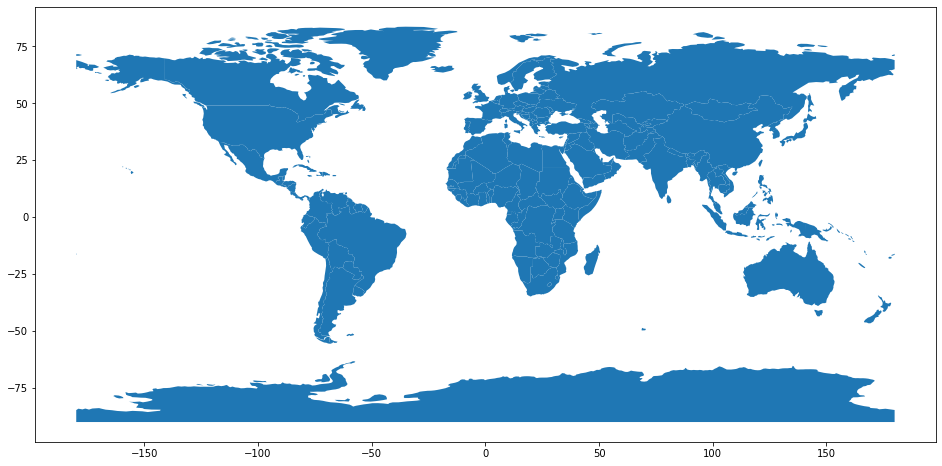

In [12]:
plt.rcParams['figure.figsize'] = [20, 8]
world.plot();

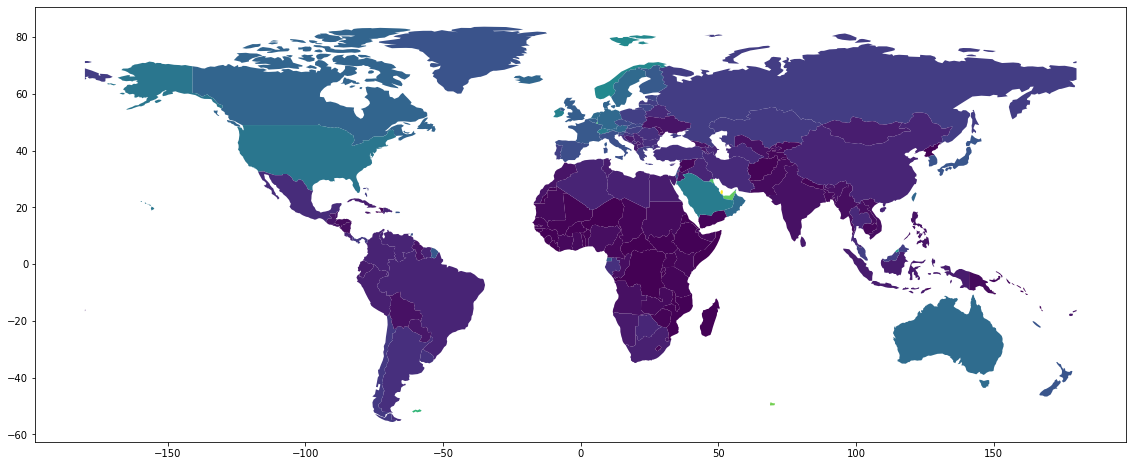

In [13]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='gdp_per_cap');

In [44]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas', 'Pasadena'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela', 'USA'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48, 34.0205],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86, -118.2856]})

In [45]:
df.head()

,City,Country,Latitude,Longitude
0,Buenos Aires,Argentina,-34.58,-58.66
1,Brasilia,Brazil,-15.78,-47.91
2,Santiago,Chile,-33.45,-70.66
3,Bogota,Colombia,4.60,-74.08
4,Caracas,Venezuela,10.48,-66.86


In [46]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

In [47]:
print(gdf)

           City    Country  Latitude  Longitude                     geometry
0  Buenos Aires  Argentina  -34.5800   -58.6600  POINT (-58.66000 -34.58000)
1      Brasilia     Brazil  -15.7800   -47.9100  POINT (-47.91000 -15.78000)
2      Santiago      Chile  -33.4500   -70.6600  POINT (-70.66000 -33.45000)
3        Bogota   Colombia    4.6000   -74.0800    POINT (-74.08000 4.60000)
4       Caracas  Venezuela   10.4800   -66.8600   POINT (-66.86000 10.48000)
5      Pasadena        USA   34.0205  -118.2856  POINT (-118.28560 34.02050)


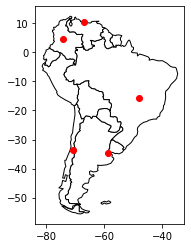

In [20]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

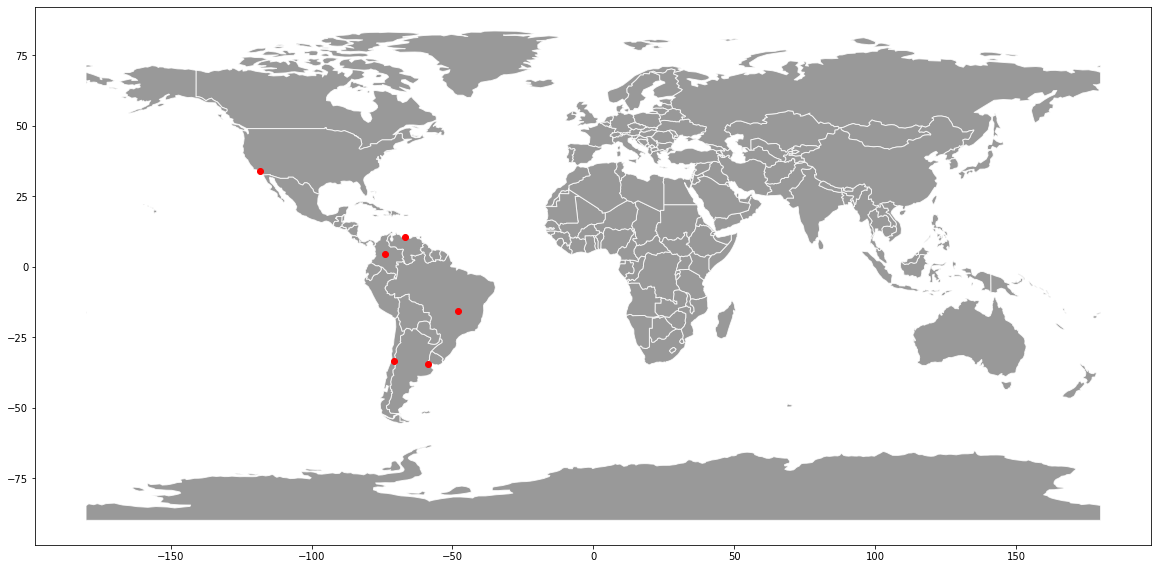

In [42]:
ax = world.plot(figsize=(20,20), color='grey', edgecolor='white',alpha=0.8)

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()